In [1]:
# Warning 생략
import warnings
warnings.filterwarnings('ignore')
# Pandas
import pandas as pd
# Numpy
import numpy as np
# ML 저장
import joblib
# 그래프
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

# ML Data 나누기
from sklearn.model_selection import train_test_split
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn import svm
from sklearn.svm import SVC
# Neural Net
from sklearn.neural_network import MLPClassifier
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# 회귀모델
from sklearn.neighbors import KNeighborsRegressor
# 선형회귀
from sklearn.linear_model import LinearRegression

# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn import datasets


# Cluster
from sklearn.cluster import KMeans
# Voting
from sklearn.ensemble import VotingClassifier
# 정확도 측정
from sklearn.metrics import accuracy_score

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 선형회귀와 경사하강법 (SGD: Stochastic Gradient Descent)의 학습방법
- 모델의 최적화된 방법을 찾도록 도움을 주는것 : 경사하강법(머신러닝 모델x)
- 가중치ㅏ와 절편을 이용해 최적화된 모델을 찾아 주는것 : 경사하강법 + 선형회귀

### 선형회귀의 가중치(w)와 절편(bias) : $y = wx + b$
머신러닝/딥러닝의 학습이란? 데이터를 계속 업데이트 하면서 모델을 적용시키면서 오차가 가장 적은 것을 기준으로 가중치와 절편을 찾는 것        
규칙 : 가중치와 절편을 계속 업데이트 하는 것        
규제 : 가중치와 절편을 줄임

---
### 당뇨병 환자 데이터

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [4]:
# data의 일부 보기
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [5]:
diabetes.target[:3]

array([151.,  75., 141.])

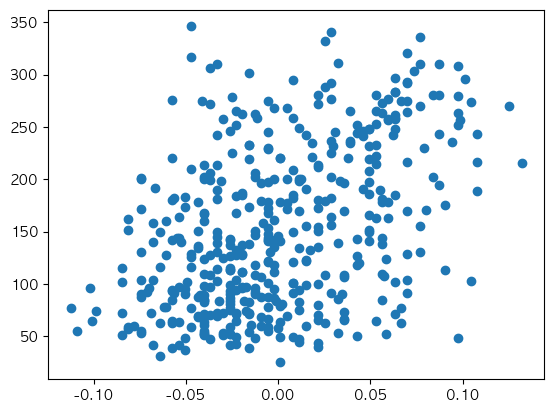

In [6]:
plt.scatter(diabetes.data[:, 3], diabetes.target)

In [7]:
# 상관 계수
np.corrcoef(diabetes.data[:,3], diabetes.target)

array([[1.        , 0.44148176],
       [0.44148176, 1.        ]])

---
### 경사 하강법
- 경사하강법은 모델이 데이터를 잘 표현할 수 있도록 기울기(변화율)를 사용하여 모델을 조금씩 조정하는 최적화 알고리즘

### 예측값과 변화율
변화율 = 0 : 최적화된 모델, 이에 해당하는 가중치를 찾아야 함        
y - y^ = 0      

### 예측값(y^)
예측값은 하나의 모델에서 수식의 결과로 나온 값.(예측값이 정답값으로 수렴하게 만든다.)

---
## 훈련데이터에서 잘맞는 w와 b를 찾는 방법
1. 무작위로 w와 b를 정합니다.
2. x에서 샘플하나를 선택하여 y^을 계산 합니다.
3. y^과 선택한 샘플의 진짜 y를 비교합니다. (오차 구하기)
4. y^이 y와 가까워 지도록 w,b를 조정합니다. (모델 조정하기 : 학습하기)
5. 모든 샘플을 처리할때 까지 2) ~ 4) 항목을 반복합니다.

In [8]:
# 훈련데이터의 Feature와 Target 정하기
x = diabetes.data[:,2]
y = diabetes.target

In [9]:
# w와 b를 초기화 하기 : 무작위로 그냥 weight와 Bias를 1로 선택
w = 1.0
b = 1.0

In [10]:
# 훈련데이터의 첫번째 Sample 데이터로 y^ 계산하기
y_hat = x[0] * w + b
y_hat

1.0616962065186832

In [11]:
# Target과 예측 데이터 비교하기
print(y_hat)
print(y[0])

1.0616962065186832
151.0


> 당연한 결과지만 Target과 예측값이 너무 많은 차이가 발생 (오차가 너무 크다)

### 경사 하강법 (w값을 조절하기)
: w와 b를 조금씩 변경해서 y_hat이 증가하는지 감소하는지 살펴보기

In [12]:
# 기존 w에 0.1만 증가해 보기
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
y_hat_inc

1.0678658271705517

In [13]:
# w값 조정한 후 예측값 정도 확인하기
# w가 0.1증가 했을때 y_hat이 얼마나 증가했는지 계산하기 (변화율 확인하기)
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.06169620651868429

> w_rate(변화율)이 x[0]의 값과 동일하다.

In [16]:
w_inc = w + 0.1
y_hat = x[1] * w + b
y_hat_inc = w_inc * x[1] + b
y_hat_inc
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

-0.05147406123880089

In [17]:
# 변화율에 대한 증명이 끝났으니 다시 훈련데이터의 1번째 값으로 변화율을 구해보자
w = b = 1
y_hat = x[0] * w + b
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
y_hat_inc
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate


0.06169620651868429

In [18]:
# 변화율로 가중치를 업데이트 하기 <- 학습하기
w_new = w + w_rate
w_new

1.0616962065186843

In [21]:
# 변화율로 절편 업데이트 하기 <- 학습하기
b_inc = b + 0.1
y_hat_inc = w * x[0] + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186833
1.0


### 오차 역전파(backpropagation)

In [22]:
# 오차 역전파로 가중치와 절편을 업데이트 합니다. (손실함수(비용함수)를 구성함)
# 오차 역전파는 y^과 y의 차이를 비용하여 w와 b를 업데이트 합니다.
# 오차와 변화율을 곱하여 가중치를 업데이트 한다.

err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + b_rate * err
print(w_new, b_new)

10.250624555903848 150.9383037934813


In [23]:
# 2번째 샘플 x[1]을 사용하여 오차를 구하고 새로운 w와 b를 구하기
y_hat = w_new * x[1] + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


# 반복문을 통해 전체 샘플을 반복하기

In [24]:
w = b = 1
for x_i, y_i in zip(x,y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


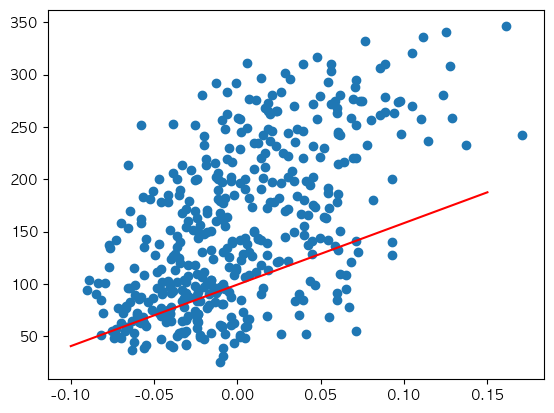

In [28]:
# 그래프로 확인하기
plt.scatter(x, y)

# 산포도의 x축에 범위에 해당하는 값을 대입
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)

# 선그리기
plt.plot([pt1[0], pt2[0]],[pt1[1], pt2[1]], c='r')

plt.show()

### Epoch로 반복하기 : w와 b를 반복적으로 계산하기

In [29]:
w = b = 1
for _ in range(100):
    for x_i, y_i in zip(x,y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364346786 123.39414383177173


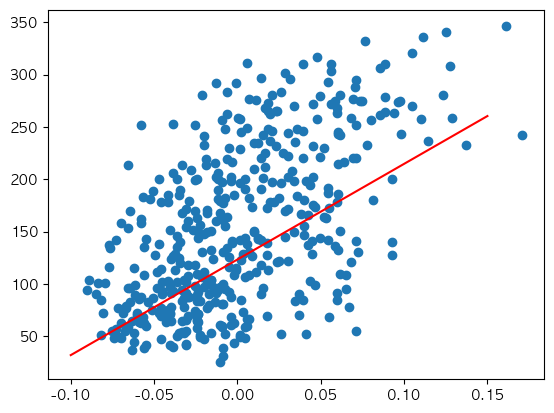

In [30]:
# 그래프로 확인하기
plt.scatter(x, y)

# 산포도의 x축에 범위에 해당하는 값을 대입
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)

# 선그리기
plt.plot([pt1[0], pt2[0]],[pt1[1], pt2[1]], c='r')

plt.show()

---
### 모델 만들기 정리
1. w와 b를 임의의 값(1,1)로 초기화 하고 훈련데이터의 샘플을 하나씩 대입하여 y와 y^의 오차를 구한다.
2. 1.에서 구한 오차를 w와 b의 변화율에 곱하고 이 값을 이용하여 w와 b를 업데이트 한다. (학습한다.)
3. 만약 y^이 y보다 커지는 오차는 음수가 되어 자동으로 w와 b가 줄어드는 방향으로 업데이트 된다.
4. 반대로 y^이 y보다 작으면 오차는 양수가 되어 w와 b는 더 커지도록 업데이트 된다.

---
### 선형 회귀를 위한 Class 만들기

In [31]:
class LRModel:
    # 초기화 작업
    def __init__(self):
        self.w = 1.0 # 가중치를 초기화
        self.b = 1.0 # 절편을 초기화

    # 정방향 계산
    def forpass(self, x):
        y_hat = x * self.w + self.b # 직선방정식을 계산
        return y_hat
    
    # 역방향 계산
    def backprop(self, x, err):
        w_grad = x * err # 가중치에 대한 그래디언트를 계산
        b_grad = 1 * err # 절편에 대한 그래디언트를 계산
        return w_grad, b_grad

    # 훈련
    def fit(self, x, y, epoch): # w,b는 처음에만 1로 초기화 되고 epoch의 크기에 따라 계속 바뀜
        for _ in range(epoch):
            for x_i, y_i in zip(x, y):
                y_hat = self.forpass(x_i)
                err = y_i - y_hat
                w_grad, b_grad = self.backprop(x_i, err)
                self.w += w_grad
                self.b += b_grad
        return self.w, self.b

In [32]:
lrmodel = LRModel()
w, b = lrmodel.fit(x, y, 100)
print(w, b)

913.5973364346786 123.39414383177173


---
# 용어정리
### 선형회귀
선형방정식을 사용하여 연속적인 값을 예측하는 알고리즘으로 데이터를 가장 잘 표현하는 방정식의 계수를 구할 수 있습니다.</br>
머신러닝 알고리즘이지만 딥러닝에서 사용하는 인공신경망의 알고리즘의 기초가 됩니다.</br>

### 경사하강법
최적화 알고리즘 중의 하나로 핵심 훈련 알고리즘 입니다.</br>
이 방법은 최적의 모델을 만드는 가중치를 한번에 찾지 않습니다.</br>
먼저 임의의 정한 가중치에서 출력을 만든후 타깃과 비교하여 오차를 줄이는 방향으로 가중치를 조정 합니다.</br>
이런 과정의 모든 훈련 샘플링에 대해서 반복하면서 최적의 가중치를 찾습니다.</br>

### 손실 함수
모델이 얼마 만큼의 오류가 있는지 측정하는 기준 입니다.</br>
함수의 값을 최소로 만드는 것이 이 모델 훈련의 목적 입니다.</br>
비용함수 (cost function) 또는 목적함수 (objectives function) 이라고도 부릅니다.</br>

선형회귀 -> 로지스틱 회귀 -> 인공신경망 -> Deep Learning